In [1]:
import pandas
import numpy

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pandas.read_excel("C:\\Users\\Raushan Kumar\\Downloads\\Code\\air_quality\\AirQualityUCI.xlsx")

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [17]:
print (
'Mean: ' , numpy. mean( df[ 'T' ]), 
'Standard Deviation: ' , numpy. std( df[ 'T' ]),
'Maximum Temperature: ' , max( df[ 'T' ]),'Minimum Temperature: ' , min( df[ 'T' ]))

Mean:  9.77659951341454 Standard Deviation:  43.20112895882725 Maximum Temperature:  44.60000038147 Minimum Temperature:  -200.0


In [18]:
df['T']

0       13.600
1       13.300
2       11.900
3       11.000
4       11.150
         ...  
9352    21.850
9353    24.325
9354    26.900
9355    28.325
9356    28.500
Name: T, Length: 9357, dtype: float64

In [130]:
df['T_t-1'] = df['T'].shift(1)

In [131]:
df_naive = df[['T','T_t-1']][1:]

In [132]:
from sklearn import metrics
from math import sqrt

In [133]:
true = df_naive['T']
prediction = df_naive['T_t-1']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  12.901026973240583


In [134]:
df['T_rm'] = df['T'].rolling(3).mean().shift(1)
df_naive = df[['T','T_rm']].dropna()
#calculated rolling sum then mean for those and then shifted to 1 unit down

In [135]:
true = df_naive['T']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  14.957264687019759


In [136]:
split = len(df) - int(0.2*len(df))
train, test = df['T'][0:split], df['T'][split:]

In [137]:
from statsmodels.graphics.tsaplots import plot_acf

In [138]:
#AIC and BIC should be lower for a best model

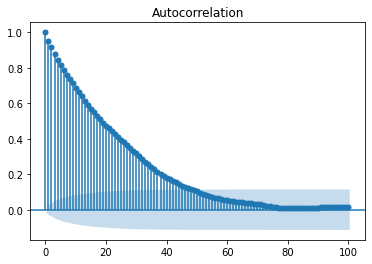

In [139]:
plot_acf(train, lags = 100)
plt.show()

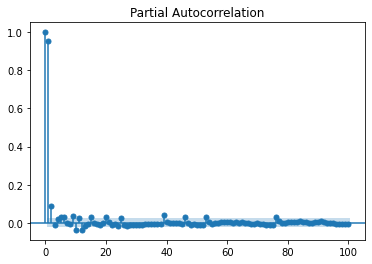

In [140]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags = 100)
plt.show()

In [141]:
from statsmodels.tsa.stattools import adfuller

#### ADF test

In [144]:
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.405394
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [145]:
result

(-10.405393998772835,
 1.8625794987074634e-18,
 14,
 7471,
 {'1%': -3.431225592055169,
  '5%': -2.861926945180301,
  '10%': -2.5669759665355576},
 59276.32787559426)

In [146]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [147]:
sunspots = sm.datasets.sunspots.load_pandas().data

In [149]:
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del sunspots["YEAR"]

<AxesSubplot:>

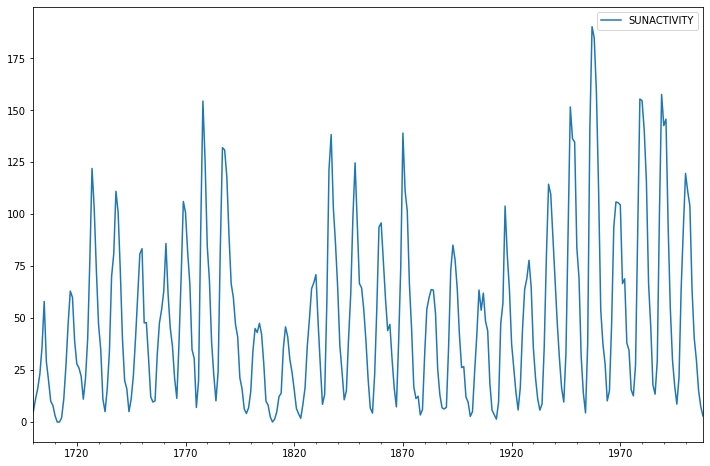

In [150]:
sunspots.plot(figsize=(12,8))

In [151]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [152]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [153]:
adf_test(sunspots['SUNACTIVITY']) #data non stationary as p values>.05

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [154]:
kpss_test(sunspots['SUNACTIVITY'])

Results of KPSS Test:
Test Statistic           0.669866
p-value                  0.016285
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<AxesSubplot:>

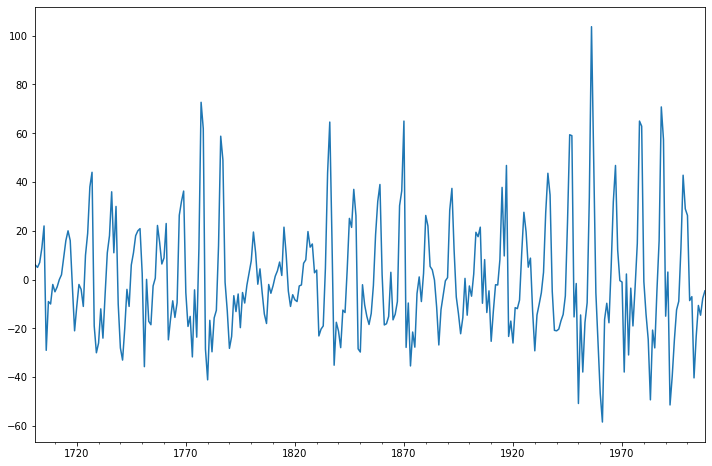

In [155]:
sunspots['SUNACTIVITY_diff'] = sunspots['SUNACTIVITY'] - sunspots['SUNACTIVITY'].shift(1)
sunspots['SUNACTIVITY_diff'].dropna().plot(figsize=(12,8))

In [156]:
adf_test(sunspots['SUNACTIVITY_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.486166e+01
p-value                        1.715552e-27
#Lags Used                     7.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


In [157]:
kpss_test(sunspots['SUNACTIVITY_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.021193
p-value                  0.100000
Lags Used                0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
#Hurst to test stationary
import hurst
H, c,data = hurst.compute_Hc(train)
print("H = {:.4f}, c = {:.4f}".format(H,c))

In [ ]:
#The value of H<0.5 shows anti-persistent behavior, and H>0.5 shows persistent behavior or a trending
#series. H=0.5 shows random
#walk/Brownian motion. The value of H<0.5, confirming that our series is
#stationary.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.values, order=(5, 0, 2))
model_fit = model.fit(disp=False)

In [ ]:
predictions = model_fit.predict(len(test))
test_ = pandas.DataFrame(test)
test_['predictions'] = predictions[0:1871]

In [ ]:
plt.plot(df['T'])
plt.plot(test_.predictions)
plt.show()

In [ ]:
error =sqrt(metrics.mean_squared_error(test.values,predictions[0:1871]))
print ('Test RMSE for ARIMA: ', error)

In [ ]:
df_multi = df[['T', 'C6H6(GT)']]
split = len(df) - int(0.2*len(df))
train_multi, test_multi = df_multi[0:split], df_multi[split:]

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(train_multi, order = (2,1))

In [ ]:
model_fit = model.fit()

In [ ]:
predictions_multi = model_fit.forecast( steps=len(test_multi))

In [ ]:
plt.plot(train_multi['T'])
plt.plot(test_multi['T'])
plt.plot(predictions_multi.iloc[:,0:1], '--')
plt.show()
plt.plot(train_multi['C6H6(GT)'])
plt.plot(test_multi['C6H6(GT)'])
plt.plot(predictions_multi.iloc[:,1:2], '--')
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr
x = train_multi['T'].values
y = train_multi['C6H6(GT)'].values
corr , p = pearsonr(x,y)
print("Corelation Coefficient = "+ str(corr),'\nP-Value =',p)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(x, exog = y, order = (2, 0, 2), seasonal_order = (2, 0, 1,3), enforce_stationarity=False, enforce_invertibility = False)

In [ ]:
model_fit = model.fit()

In [ ]:
y_ = test_multi['C6H6(GT)'].values
predicted = model_fit.predict(exog=y_)
test_multi_ = pandas.DataFrame(test)
test_multi_['predictions'] = predicted[0:1871]
plt.plot(train_multi['T'])
plt.plot(test_multi_['T'])
plt.plot(test_multi_.predictions, '--')

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train.values, trend='add')
model_fit = model.fit()

In [ ]:
predictions_ = model_fit.predict(len(test))
plt.plot(test.values)
plt.plot(predictions_[1:1871])

In [ ]:
prediction = []
data = train.values
for t in test.values:
    model = (ExponentialSmoothing(data).fit())
    y = model.predict()
    prediction.append(y[0])
    data = numpy.append(data, t)

In [ ]:
test_ = pandas.DataFrame(test)
test_['predictionswf'] = prediction

In [ ]:
plt.plot(test_['T'])
plt.plot(test_.predictionswf, '--')
plt.show()

In [ ]:
error = sqrt(metrics.mean_squared_error(test.values,prediction))
print ('Test RMSE for Triple Exponential Smoothing with Walk-Forward Validation: ', error)

In [ ]:
x = numpy.arange (1,500,1)
y = 0.4 * x + 30
plt.plot(x,y)

In [ ]:
trainx, testx = x[0:int(0.8*(len(x)))], x[int(0.8*(len(x))):]
trainy, testy = y[0:int(0.8*(len(y)))], y[int(0.8*(len(y))):]
train = numpy.array(list(zip(trainx,trainy)))
test = numpy.array(list(zip(trainx,trainy)))

In [ ]:
def create_dataset(n_X, look_back):
    dataX, dataY = [], []
    for i in range(len(n_X)-look_back):
        a = n_X[i:(i+look_back), ]
        dataX.append(a)
        dataY.append(n_X[i + look_back, ])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)
trainx = numpy.reshape(trainx, (trainx.shape[0], 1, 2))
testx = numpy.reshape(testx, (testx.shape[0], 1, 2))

In [ ]:
pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()

In [ ]:
model.add(LSTM(256, return_sequences = True, input_shape =(trainx.shape[1], 2)))
model.add(LSTM(128,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainx, trainy, epochs = 2000, batch_size = 10, verbose = 2,
shuffle = False)
model.save_weights('LSTMBasic1.h5')

In [ ]:
model.load_weights('LSTMBasic1.h5')
predict = model.predict(testx)

In [ ]:
plt.plot(testx.reshape(398,2)[:,0:1], testx.reshape(398,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])

In [ ]:
x = numpy.arange (1,500,1)
y = numpy.sin(x)
plt.plot(x,y)

In [ ]:
trainx, testx = x[0:int(0.8*(len(x)))], x[int(0.8*(len(x))):]
trainy, testy = y[0:int(0.8*(len(y)))], y[int(0.8*(len(y))):]
train = numpy.array(list(zip(trainx,trainy)))
test = numpy.array(list(zip(trainx,trainy)))

In [ ]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)
trainx = numpy.reshape(trainx, (trainx.shape[0], 1, 2))
testx = numpy.reshape(testx, (testx.shape[0], 1, 2))

In [ ]:
model = Sequential()
model.add(LSTM(512, return_sequences = True, input_shape =
(trainx.shape[1], 2)))
model.add(LSTM(256,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainx, trainy, epochs = 2000, batch_size = 10, verbose = 2,
shuffle = False)
model.save_weights('LSTMBasic2.h5')

In [ ]:
model.load_weights('LSTMBasic2.h5')
predict = model.predict(testx)

In [ ]:
plt.plot(trainx.reshape(398,2)[:,0:1], trainx.reshape(398,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])

# Examples

In [158]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [159]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [160]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [161]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          2.83e-239
Time:                        17:18:38   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [165]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [166]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           6.30e-27
Time:                        17:25:59   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [167]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


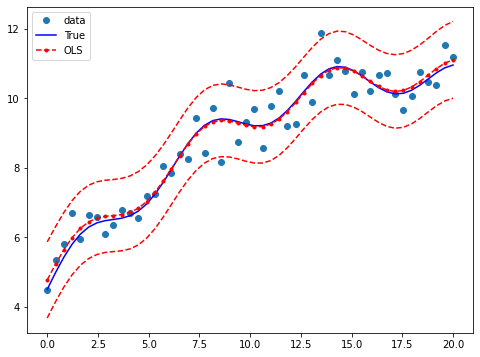

In [168]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [170]:
from urllib.request import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [171]:
url = 'http://stats191.stanford.edu/data/salary.table'
fh = urlopen(url)
salary_table = pd.read_table(fh)
salary_table.to_csv('salary.table')

In [172]:
salary_table

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0
5,20872,2,2,1
6,11772,2,2,0
7,10535,2,1,0
8,12195,2,3,0
9,12313,3,2,0


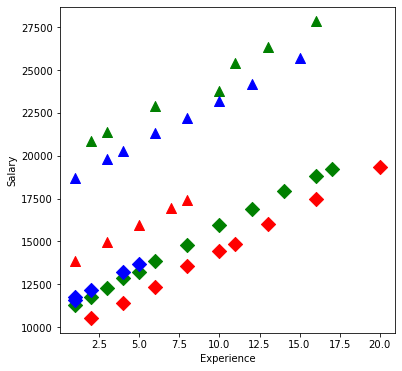

In [174]:
plt.figure(figsize=(6,6))
symbols = ['D', '^']
colors = ['r', 'g', 'blue']
factor_groups = salary_table.groupby(['E','M'])
for values, group in factor_groups:
    i,j = values
    plt.scatter(group['X'], group['S'], marker=symbols[j], color=colors[i-1],
               s=100)
plt.xlabel('Experience');
plt.ylabel('Salary');

In [175]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.23e-27
Time:                        21:23:01   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [177]:
lm.model.exog

array([[ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  2.],
       [ 1.,  1.,  0.,  0.,  2.],
       [ 1.,  0.,  0.,  0.,  2.],
       [ 1.,  0.,  1.,  0.,  2.],
       [ 1.,  1.,  0.,  0.,  3.],
       [ 1.,  0.,  0.,  1.,  3.],
       [ 1.,  1.,  0.,  1.,  3.],
       [ 1.,  0.,  1.,  1.,  3.],
       [ 1.,  0.,  0.,  0.,  4.],
       [ 1.,  0.,  1.,  1.,  4.],
       [ 1.,  0.,  1.,  0.,  4.],
       [ 1.,  1.,  0.,  0.,  4.],
       [ 1.,  1.,  0.,  0.,  5.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  5.],
       [ 1.,  0.,  0.,  0.,  6.],
       [ 1.,  0.,  1.,  1.,  6.],
       [ 1.,  1.,  0.,  0.,  6.],
       [ 1.,  1.,  0.,  1.,  6.],
       [ 1.,  0.,  0.,  1.,  7.],
       [ 1.,  1.,  0.,  0.,  8.],
       [ 1.,  0.,  0.,  1.,  8.],
       [ 1.,  0.,  1.,  1.,  8.],
       [ 1.,  0.,  0.,  0.,  8.],
       [ 1.,  

In [179]:
infl = lm.get_influence()
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0  13876.000  15465.313      0.104     -1.683      0.155     -0.722     -1.723     -0.739
         1  11608.000  11577.992      0.000      0.031      0.130      0.012      0.031      0.012
         2  18701.000  18461.523      0.001      0.247      0.109      0.086      0.244      0.085
         3  11283.000  11725.817      0.005     -0.458      0.113     -0.163     -0.453     -0.162
         4  11767.000  11577.992      0.001      0.197      0.130      0.076      0.195      0.075
         5  20872.000  19155.532      0.092      1.787      0.126      0.678      1.838      0.698
         6  11772.000  12272.001      0.006     -0.513      0.101     -0.172     -0.509     -0.170
         7

In [180]:
df_infl = infl.summary_frame()

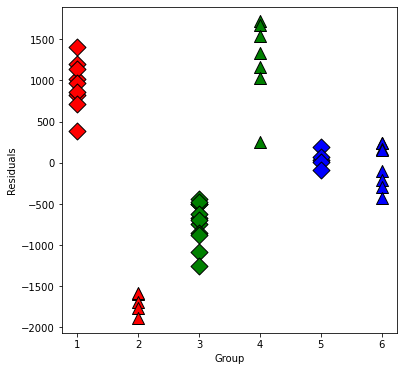

In [181]:
resid = lm.resid
plt.figure(figsize=(6,6));
for values, group in factor_groups:
    i,j = values
    group_num = i*2 + j - 1  # for plotting purposes
    x = [group_num] * len(group)
    plt.scatter(x, resid[group.index], marker=symbols[j], color=colors[i-1],
            s=144, edgecolors='black')
plt.xlabel('Group');
plt.ylabel('Residuals');

In [182]:
interX_lm = ols("S ~ C(E) * X + C(M)", salary_table).fit()
print(interX_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     158.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.23e-26
Time:                        21:29:17   Log-Likelihood:                -379.47
No. Observations:                  46   AIC:                             772.9
Df Residuals:                      39   BIC:                             785.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7256.2800    549.494     13.205      

In [183]:
from statsmodels.stats.api import anova_lm

table1 = anova_lm(lm, interX_lm)
print(table1)

interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
print(interM_lm.summary())

table2 = anova_lm(lm, interM_lm)
print(table2)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      41.0  4.328072e+07      0.0           NaN       NaN       NaN
1      39.0  3.941068e+07      2.0  3.870040e+06  1.914856  0.160964
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.67e-55
Time:                        21:29:49   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
   

In [185]:
pip install pandas_datareader

# Time Series

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [187]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

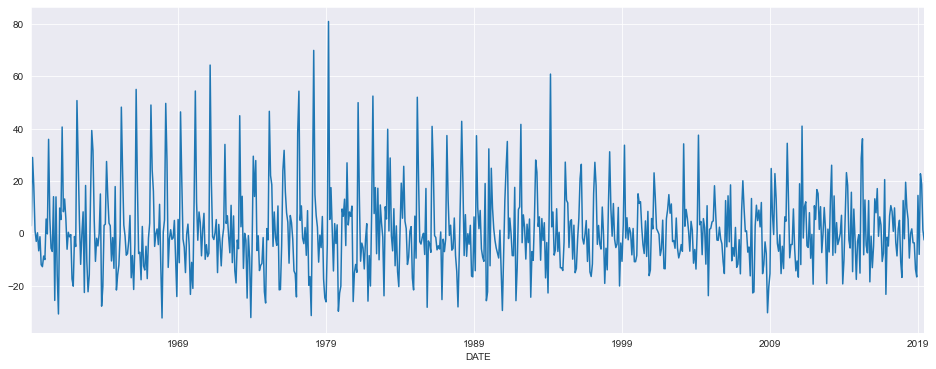

In [188]:
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [205]:
mod = AutoReg(housing, 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 18 Sep 2020   AIC                              5.468
Time:                        09:00:09   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [206]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 18 Sep 2020   AIC                              5.468
Time:                        09:04:27   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.601      1.869      0.062      -0.055       2.300
HOUSTNSA.L1     0.1910      0.035      5.499      0.000       0.123       0.259
HOUSTNSA.L2     0.0058      0.039      0.150    

In [208]:
sel = ar_select_order(housing, 13)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [209]:
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Fri, 18 Sep 2020   AIC                              4.722
Time:                        09:15:45   BIC                              4.818
Sample:                    03-01-1960   HQIC                             4.759
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

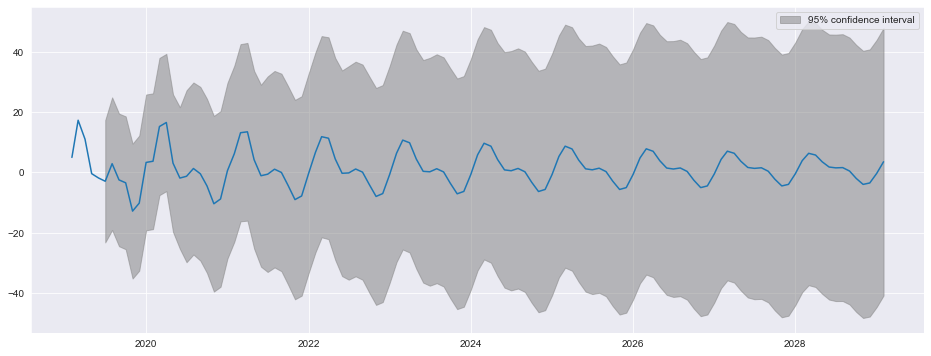

In [210]:
fig = res.plot_predict(720, 840)

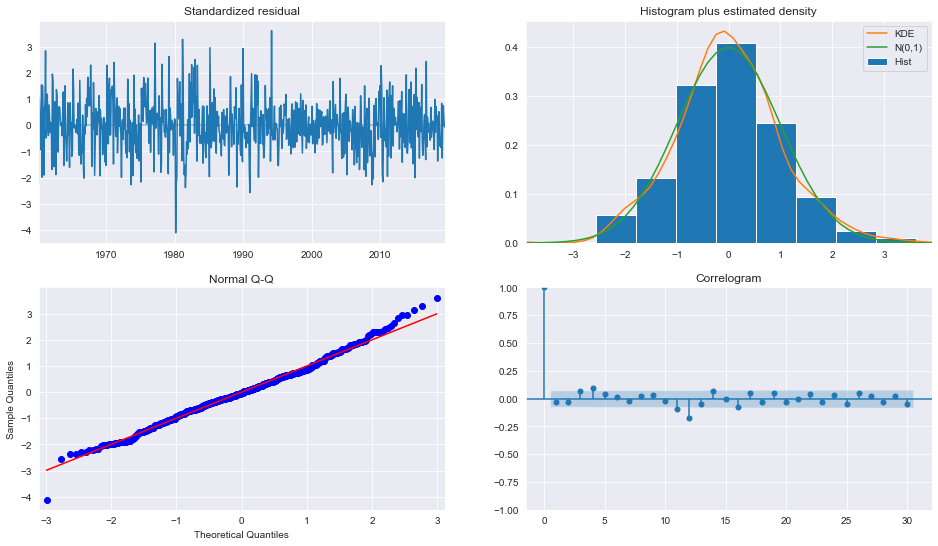

In [211]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [213]:
sel = ar_select_order(housing, 13, seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Fri, 18 Sep 2020   AIC                              4.541
Time:                        09:28:46   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2726      1.373      0.927      0.354      -1.418       3.963
seasonal.1     32.6477      1.824     17.901      0.000      29.073      36.222
seasonal.2     23.0685      2.435      9.472    

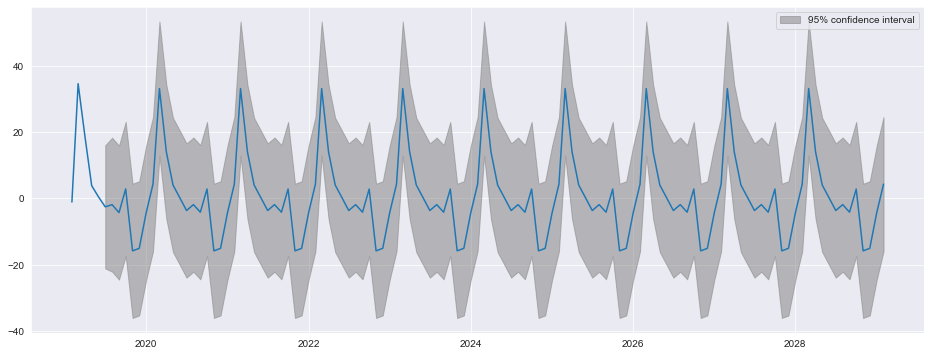

In [214]:
fig = res.plot_predict(720, 840)

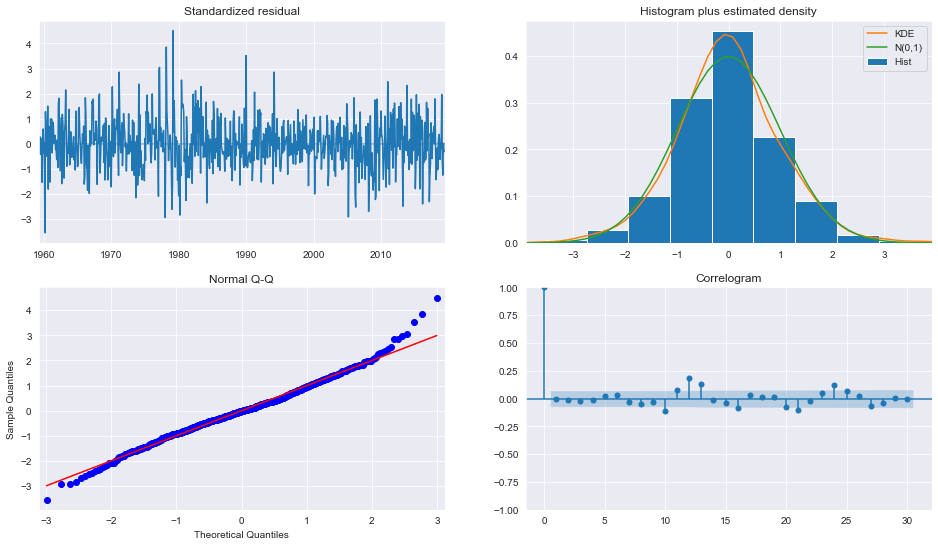

In [215]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

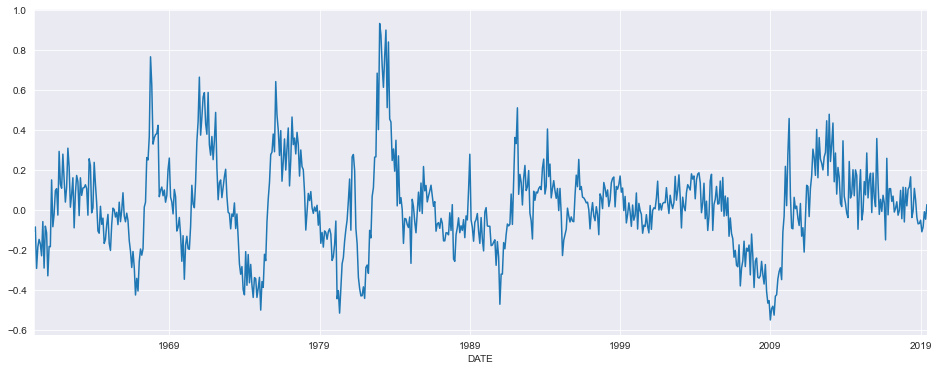

In [216]:
yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

In [218]:
sel = ar_select_order(yoy_housing, 13)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [220]:
sel = ar_select_order(yoy_housing, 13, glob=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                 589.177
Method:               Conditional MLE   S.D. of innovations              0.104
Date:                Fri, 18 Sep 2020   AIC                             -4.496
Time:                        11:56:36   BIC                             -4.444
Sample:                    02-01-1961   HQIC                            -4.476
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0035      0.004      0.875      0.382      -0.004       0.011
HOUSTNSA.L1      0.5640      0.035     16.167      0.000       0.496       0.632
HOUSTNSA.L2      0.2347      0.038      6.23

In [222]:
sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                                
Dep. Variable:                     HOUSTNSA   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Fri, 18 Sep 2020   AIC                             -4.469
Time:                              12:01:28   BIC                             -4.346
Sample:                          02-01-1961   HQIC                            -4.422
                               - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0167      0.014      1.215      0.224      -0.010       0.044
seasonal.1      -0.0179      0.019     -0.931      0.352      -0.056       0.

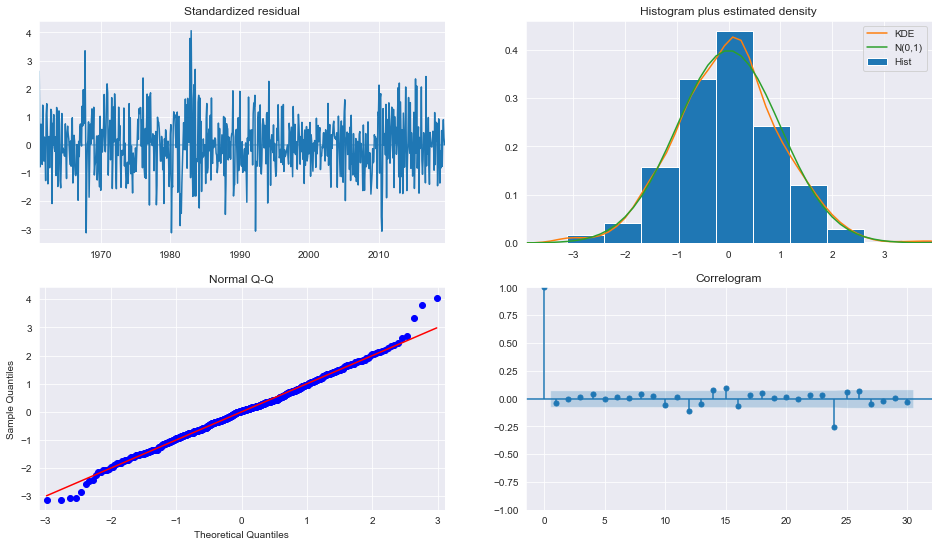

In [223]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [ ]:
sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

<AxesSubplot:xlabel='DATE'>

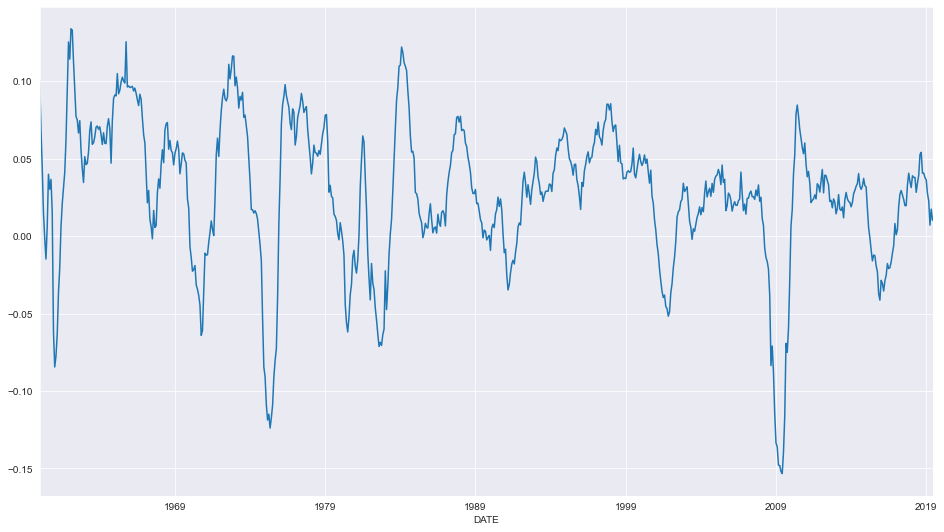

In [224]:
data = pdr.get_data_fred('INDPRO', '1959-01-01', '2019-06-01')
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq('MS')
_, ax = plt.subplots(figsize=(16,9))
ind_prod.plot(ax=ax)

In [226]:
sel = ar_select_order(ind_prod, 13, 'bic')
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2318.848
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 18 Sep 2020   AIC                             -9.411
Time:                        12:41:09   BIC                             -9.313
Sample:                    02-01-1961   HQIC                            -9.373
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.896      0.004       0.000       0.002
INDPRO.L1      1.1504      0.035     32.940      0.000       1.082       1.219
INDPRO.L2     -0.0747      0.053     -1.407      0.1

In [228]:
sel = ar_select_order(ind_prod, 13, 'bic', glob=True)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2318.848
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 18 Sep 2020   AIC                             -9.411
Time:                        12:43:27   BIC                             -9.313
Sample:                    02-01-1961   HQIC                            -9.373
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.896      0.004       0.000       0.002
INDPRO.L1      1.1504      0.035     32.940      0.000       1.082       1.219
INDPRO.L2     -0.0747      0.053     -1.407      0.1

In [229]:
ind_prod.shape

(714,)

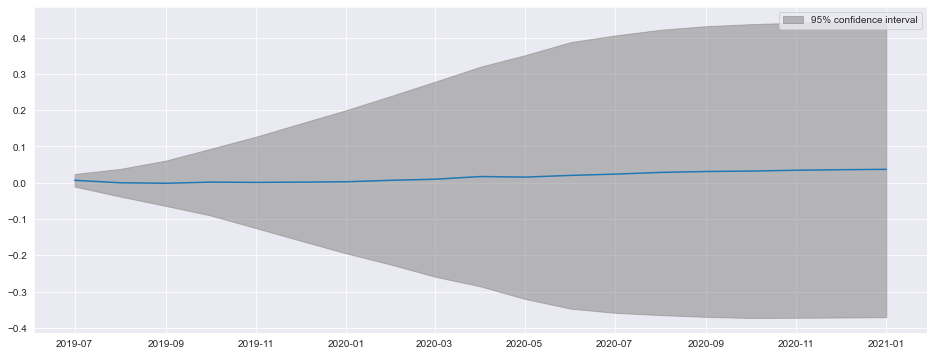

In [230]:
fig = res_glob.plot_predict(start=714, end=732)

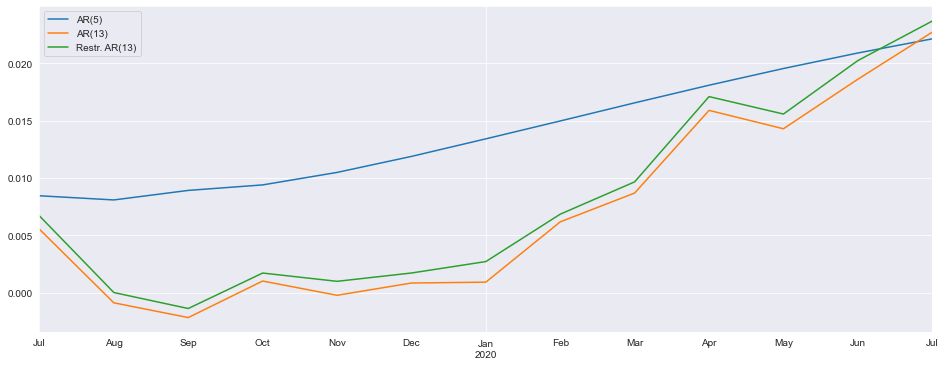

In [232]:
res_ar5 = AutoReg(ind_prod, 5).fit()
predictions = pd.DataFrame({"AR(5)": res_ar5.predict(start=714, end=726),
                            "AR(13)": res.predict(start=714, end=726),
                            "Restr. AR(13)": res_glob.predict(start=714, end=726)})
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

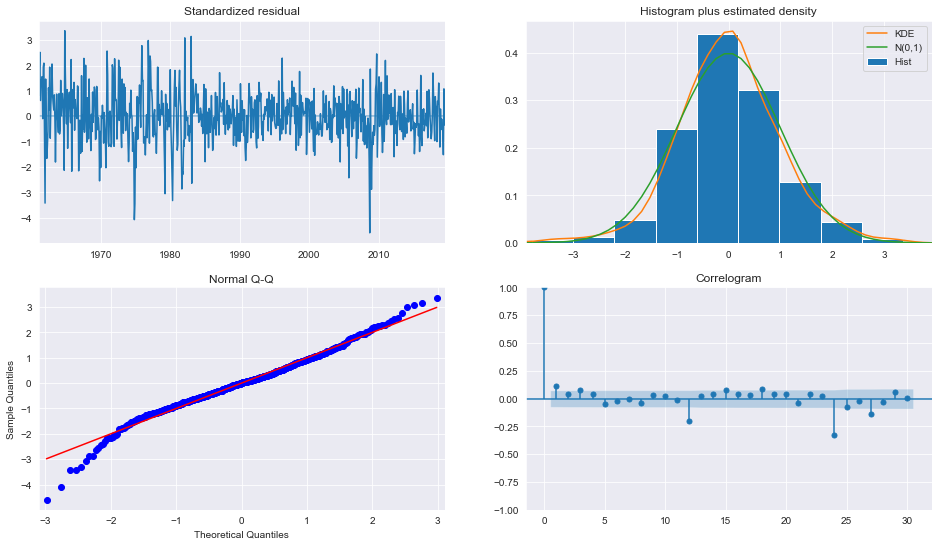

In [233]:
fig = plt.figure(figsize=(16,9))
fig = res_glob.plot_diagnostics(fig=fig, lags=30)

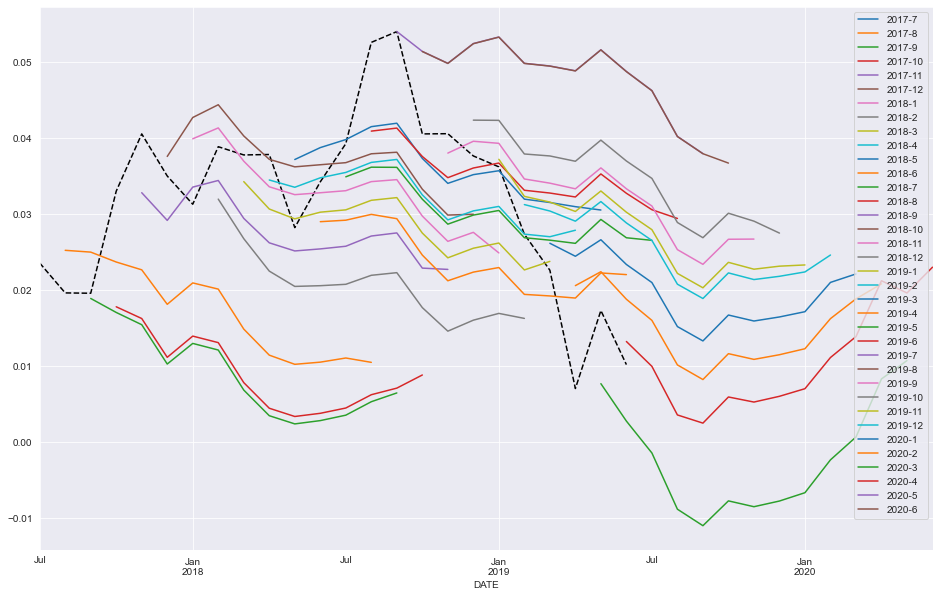

In [234]:
import numpy as np
start = ind_prod.index[-24]
forecast_index = pd.date_range(start, freq=ind_prod.index.freq, periods=36)
cols = ['-'.join(str(val) for val in (idx.year, idx.month)) for idx in forecast_index]
forecasts = pd.DataFrame(index=forecast_index,columns=cols)
for i in range(1, 24):
    fcast = res_glob.predict(start=forecast_index[i], end=forecast_index[i+12], dynamic=True)
    forecasts.loc[fcast.index, cols[i]] = fcast
_, ax = plt.subplots(figsize=(16, 10))
ind_prod.iloc[-24:].plot(ax=ax, color="black", linestyle="--")
ax = forecasts.plot(ax=ax)

In [235]:
from statsmodels.tsa.api import SARIMAX

sarimax_mod = SARIMAX(ind_prod, order=((1,5,12,13),0, 0), trend='c')
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            INDPRO   No. Observations:                  714
Model:             SARIMAX([1, 5, 12, 13], 0, 0)   Log Likelihood                2302.146
Date:                           Fri, 18 Sep 2020   AIC                          -4592.293
Time:                                   12:51:32   BIC                          -4564.867
Sample:                               01-01-1960   HQIC                         -4581.701
                                    - 06-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.000      2.627      0.009       0.000       0.002
ar.L1          1.0798      0.010    106.388

In [236]:
sarimax_params = sarimax_res.params.iloc[:-1].copy()
sarimax_params.index = res_glob.params.index
params = pd.concat([res_glob.params, sarimax_params], axis=1, sort=False)
params.columns = ["AutoReg", "SARIMAX"]
params

,AutoReg,SARIMAX
intercept,0.001292,0.001140
INDPRO.L1,1.088215,1.079829
INDPRO.L5,-0.105668,-0.084904
INDPRO.L12,-0.385171,-0.439175
INDPRO.L13,0.358738,0.403241


In [240]:
from statsmodels.tsa.deterministic import DeterministicProcess

ModuleNotFoundError: No module named 'statsmodels.tsa.deterministic'

In [237]:
dp = DeterministicProcess(housing.index, constant=True, period=12, fourier=2)
mod = AutoReg(housing,2, trend="n",seasonal=False, deterministic=dp)
res = mod.fit()
print(res.summary())

ModuleNotFoundError: No module named 'statsmodels.tsa.deterministic'

In [7]:
pip install statsmodels

In [12]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [13]:
from statsmodels.graphics.api import qqplot

In [14]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [15]:
dta = sm.datasets.sunspots.load_pandas().data

In [17]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

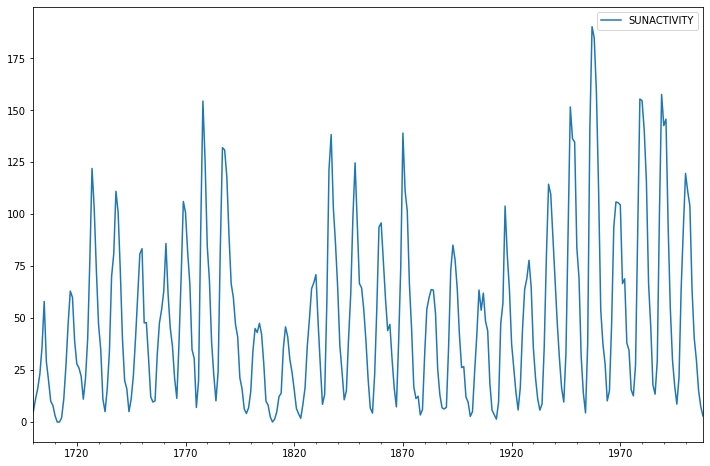

In [19]:
dta.plot(figsize=(12,8));

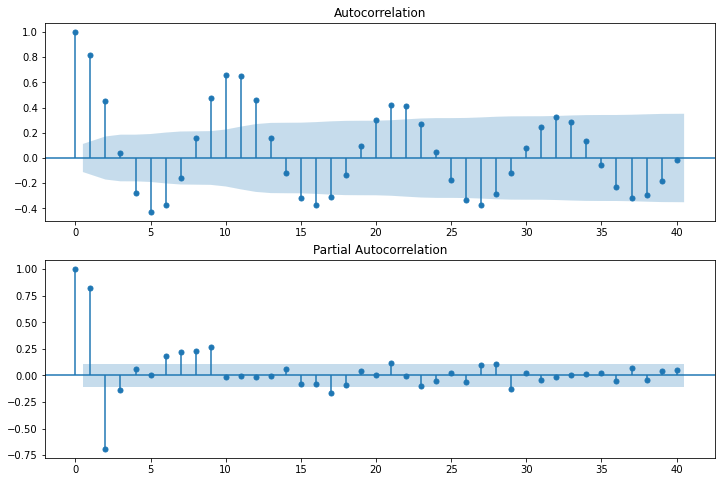

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [27]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()

C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [28]:
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


In [29]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [30]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.637093301205 2637.5704584087957 2628.607481146451


In [33]:
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [32]:
print(arma_mod30.aic,arma_mod30.bic, arma_mod30.hqic)

2619.4036292456585 2638.0703356301474 2626.866614052216


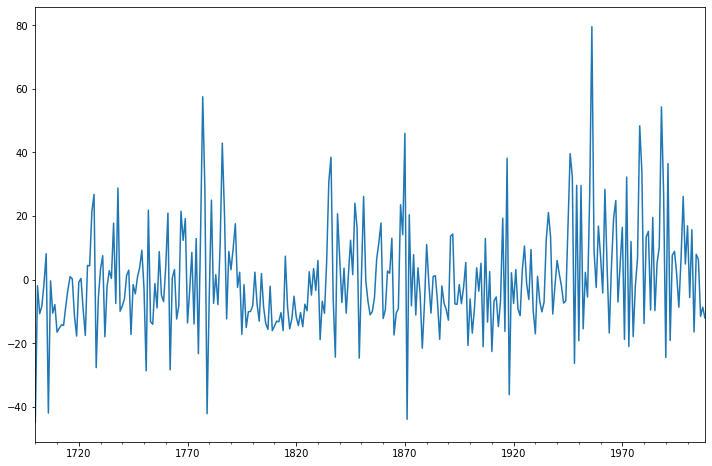

In [34]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [35]:
resid = arma_mod30.resid

In [36]:
stats.normaltest(resid)

NormaltestResult(statistic=49.843932231095614, pvalue=1.5015079563876674e-11)

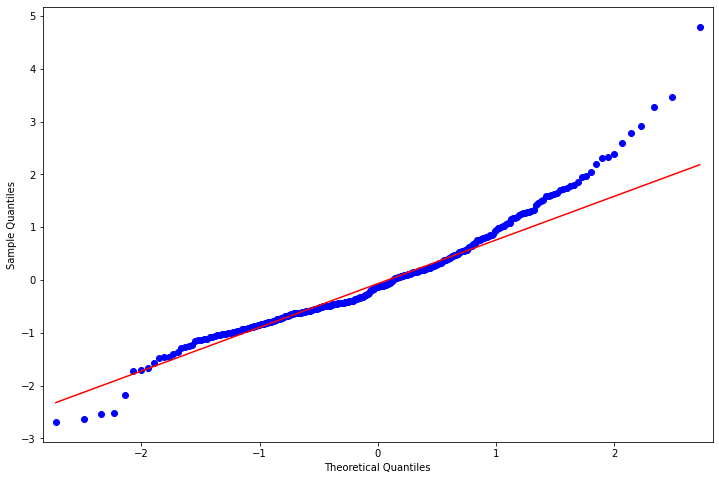

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

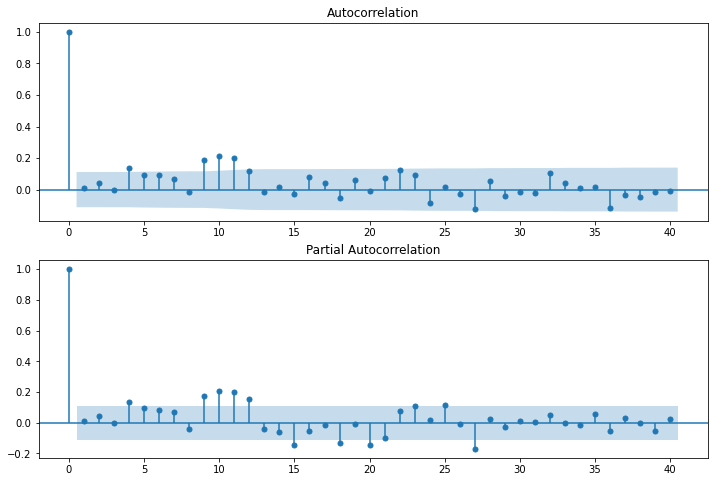

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [42]:
sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)

(array([ 1.        ,  0.0091704 ,  0.04179279, -0.00133813,  0.13608634,
         0.09246493,  0.09194654,  0.06874675, -0.01502236,  0.18759046,
         0.21371477,  0.20107942,  0.11717979, -0.01405693,  0.01539768,
        -0.02496853,  0.08091553,  0.04113791, -0.05202196,  0.06249639,
        -0.01030253,  0.07445262,  0.12495391,  0.09316154, -0.0821524 ,
         0.01569555, -0.02503668, -0.1258618 ,  0.05322677, -0.03869276,
        -0.01690301, -0.01929679,  0.10499005,  0.04008581,  0.00882922,
         0.01458857, -0.11932949, -0.03666443, -0.04619281, -0.01776768,
        -0.0062196 ]),
 array([2.62388521e-02, 5.72981910e-01, 5.73544243e-01, 6.40864169e+00,
        9.11135126e+00, 1.17926613e+01, 1.32965521e+01, 1.33686013e+01,
        2.46410722e+01, 3.93207580e+01, 5.23595651e+01, 5.68024785e+01,
        5.68666302e+01, 5.69438640e+01, 5.71476422e+01, 5.92950523e+01,
        5.98520078e+01, 6.07457232e+01, 6.20400105e+01, 6.20753051e+01,
        6.39249413e+01, 6.9152954

In [40]:
np.c_[range(1,41), r[1:], q, p]

array([[ 1.00000000e+00,  9.17040128e-03,  2.62388521e-02,
         8.71318366e-01],
       [ 2.00000000e+00,  4.17927926e-02,  5.72981910e-01,
         7.50893870e-01],
       [ 3.00000000e+00, -1.33812960e-03,  5.73544243e-01,
         9.02461192e-01],
       [ 4.00000000e+00,  1.36086343e-01,  6.40864169e+00,
         1.70638486e-01],
       [ 5.00000000e+00,  9.24649303e-02,  9.11135126e+00,
         1.04704311e-01],
       [ 6.00000000e+00,  9.19465419e-02,  1.17926613e+01,
         6.67573726e-02],
       [ 7.00000000e+00,  6.87467526e-02,  1.32965521e+01,
         6.52042480e-02],
       [ 8.00000000e+00, -1.50223618e-02,  1.33686013e+01,
         9.97808582e-02],
       [ 9.00000000e+00,  1.87590463e-01,  2.46410722e+01,
         3.39496305e-03],
       [ 1.00000000e+01,  2.13714771e-01,  3.93207580e+01,
         2.23058804e-05],
       [ 1.10000000e+01,  2.01079422e-01,  5.23595651e+01,
         2.34648972e-07],
       [ 1.20000000e+01,  1.17179789e-01,  5.68024785e+01,
      

In [39]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


In [43]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424878
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, dtype: float64


In [44]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [45]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.634832977447581

In [49]:
dta = sm.datasets.macrodata.load_pandas().data

In [50]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(index)

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)


In [51]:
dta.index = index
del dta['year']
del dta['quarter']

In [52]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

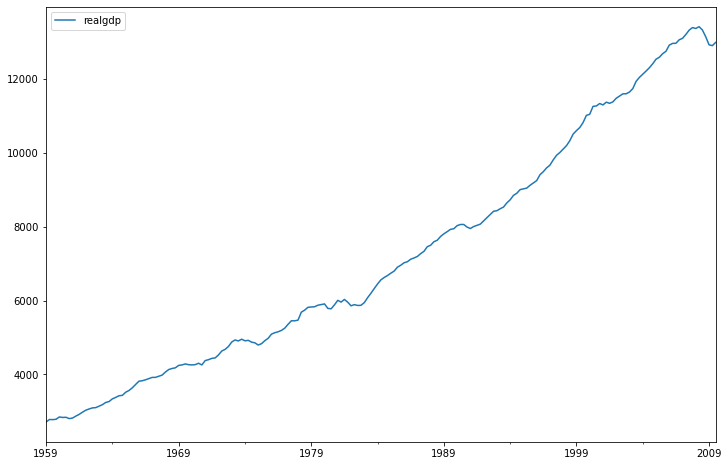

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20)

In [58]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(dta.realgdp)

In [59]:
gdp_decomp = dta[['realgdp']].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

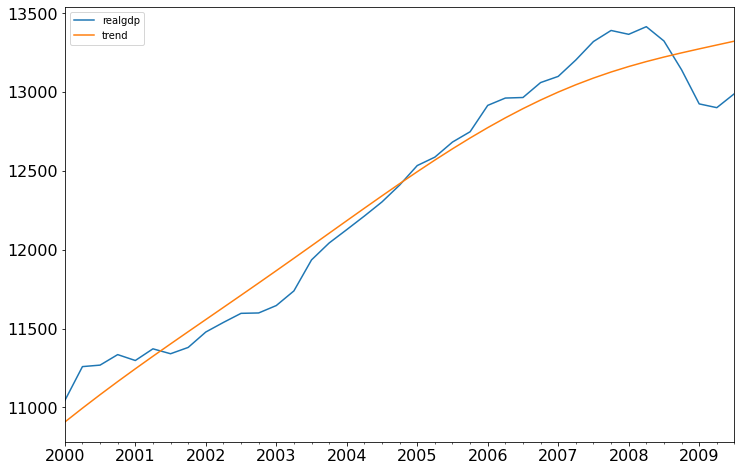

In [62]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16);
legend = ax.get_legend()
legend.prop.set_size(20);

In [64]:
bk_cycles = sm.tsa.filters.bkfilter(dta[["infl","unemp"]])

<AxesSubplot:>

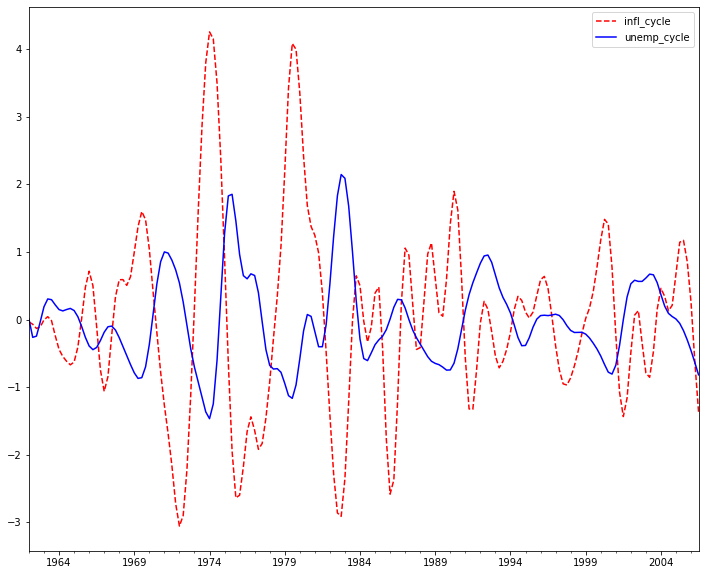

In [65]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
bk_cycles.plot(ax=ax, style=['r--', 'b-'])

In [66]:
print(sm.tsa.stattools.adfuller(dta['unemp'])[:3])

(-2.536458467334637, 0.10685366457233464, 9)


In [68]:
print(sm.tsa.stattools.adfuller(dta['infl'])[:3])

(-3.054514496257238, 0.030107620863485774, 2)


In [69]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(dta[["infl","unemp"]])
print(cf_cycles.head(10))

            infl_cycle  unemp_cycle
1959-03-31    0.237927    -0.216867
1959-06-30    0.770007    -0.343779
1959-09-30    1.177736    -0.511024
1959-12-31    1.256754    -0.686967
1960-03-31    0.972128    -0.770793
1960-06-30    0.491889    -0.640601
1960-09-30    0.070189    -0.249741
1960-12-31   -0.130432     0.301545
1961-03-31   -0.134155     0.788992
1961-06-30   -0.092073     0.985356


<AxesSubplot:>

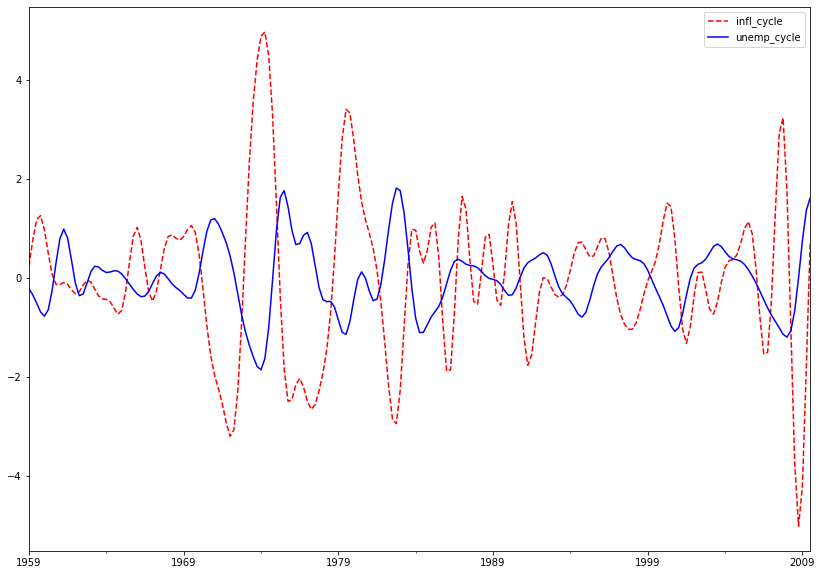

In [70]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
cf_cycles.plot(ax=ax, style=['r--','b-'])

In [71]:
dta[["infl","unemp"]]

,infl,unemp
1959-03-31,0.00,5.8
1959-06-30,2.34,5.1
1959-09-30,2.74,5.3
1959-12-31,0.27,5.6
1960-03-31,2.31,5.2
...,...,...
2008-09-30,-3.16,6.0
2008-12-31,-8.79,6.9
2009-03-31,0.94,8.1
2009-06-30,3.37,9.2


# Exponential smoothing

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [4]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


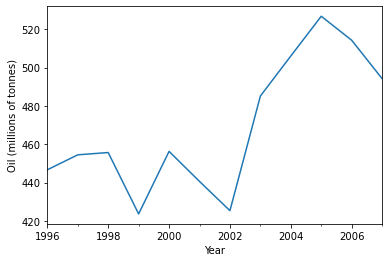

In [77]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

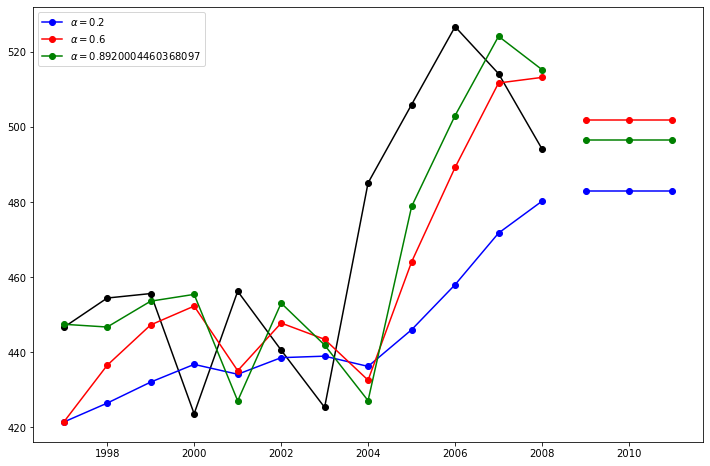

In [5]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

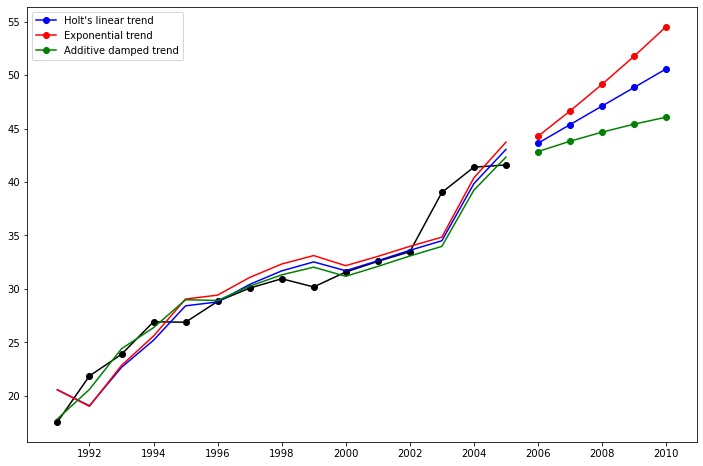

In [7]:
fit1 = Holt(air, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [8]:
fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fit3 = Holt(livestock2,exponential=True, initialization_method="estimated").fit()
fit4 = Holt(livestock2,damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fit5 = Holt(livestock2,exponential=True, damped_trend=True, initialization_method="estimated").fit()
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974304,0.977638,0.978847,0.974910
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981636
$l_0$,263.917712,258.880967,260.340570,257.357883,258.941860
$b_0$,NaN,5.011579,1.013780,6.645553,1.038160
SSE,6761.350235,6004.138221,6104.194748,6036.555023,6081.995136


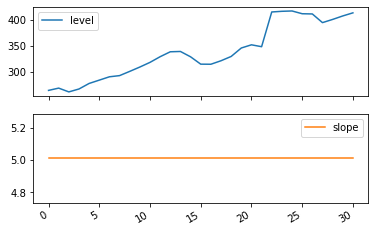

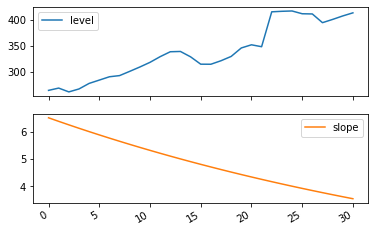

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [9]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.trend]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

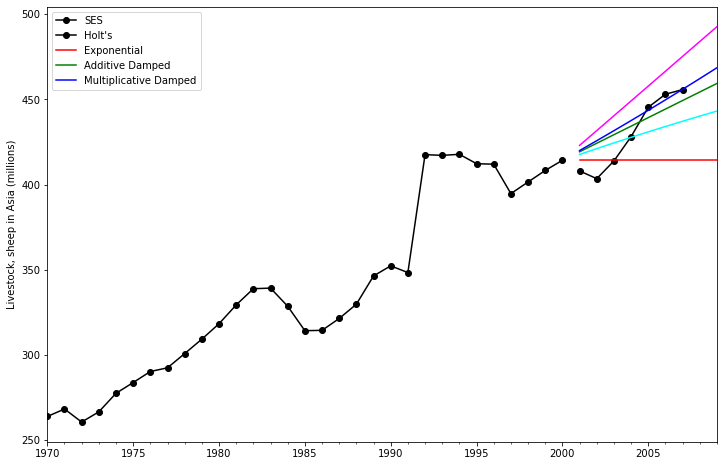

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [10]:
fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

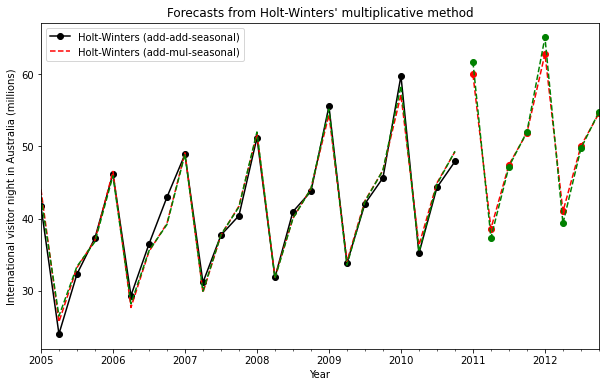

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.490116e-08,1.490116e-08,1.490116e-08,1.490116e-08
$\beta$,1.409860e-08,0.000000e+00,6.490748e-09,5.042337e-09
$\phi$,NaN,NaN,9.430416e-01,9.536043e-01
$\gamma$,0.000000e+00,9.477870e-16,0.000000e+00,0.000000e+00
$l_0$,1.119347e+01,1.106375e+01,1.084022e+01,9.899272e+00
$b_0$,1.205395e-01,1.198955e-01,2.456749e-01,1.975442e-01
SSE,4.402746e+01,3.611262e+01,3.527619e+01,3.062033e+01


In [11]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results